# Wave equation

u_{tt} − u_{xx} = 0 , x ∈ [0, 1] ,
u(t, 0) = 0 = u(t, 1),
u(0, x) = u˚(x) , u_t(0, x) = p˚(x),
using the 2nd order finite difference scheme

Plot for n = 128:


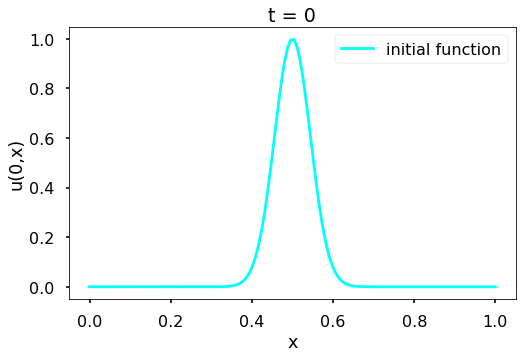

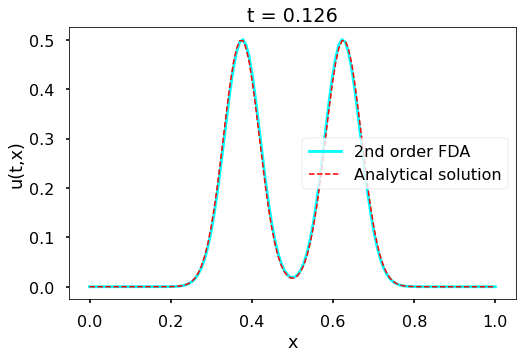

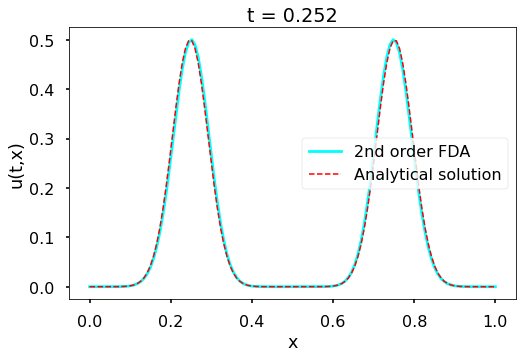

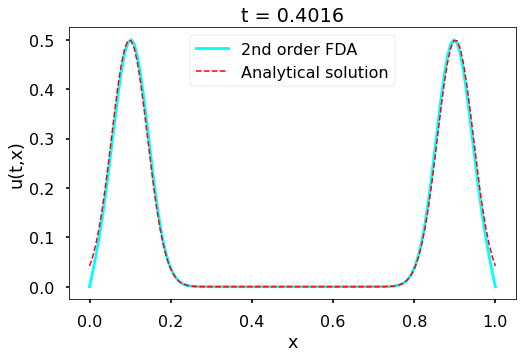

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn-poster')
%matplotlib inline

e = []

#to get convergence order repeat with different number of grid points
for o in range(1,9):
    n = 16*o
    h = 1/(n-1)

    # Initial conditions
    uo = np.zeros(n)
    po = np.zeros(n)
    x = np.zeros(n)
    for j in range(0, n):
        x[j] = (j)*h
        #initial function
        uo[j] = math.exp(-((j*h) - 0.5)**2*256)
        if uo[j] < 0.0001:
            uo[j] = 0
            
    #number of time steps m
    m = n
    dt = h/2

    #evolution scheme
    sol = []
    u = np.zeros(n)
    v = uo - po*dt
    sol.append(v)
    sol.append(uo)
    a = np.zeros(n)
    b = np.zeros(n)


    for s in range(1, m+1):
        for k in range(1, n-1):
            a = sol[s]
            b = sol[s-1]
            u[k] = (a[k+1] - 2*a[k]+ a[k-1])*dt**2/h**2 + 2*a[k] - b[k]
        sol.append(u)
        u = u*0
        a = a*0
        b = b*0
        #print(sol)
    
    #needed for plot
    y = np.linspace(0, 1, n)
    
    #plot initial function for one of the grids
    if o == 8:
        print("Plot for n = " + str(n) + ':')
        plt.figure(figsize=(8,5))
        plt.plot(y, uo, label = "initial function", color = "cyan")
        #plt.plot(1, 10, 'ro')
        plt.xlabel('x')
        plt.ylabel('u(0,x)')
        plt.title("t = 0")
        plt.legend()
        plt.show()
    
    #get analytical solutions at different times
    u0 = np.zeros(n)
    for i in range(0,n):
        u0[i] = math.exp(-((i*h)-m*dt-0.5)**2*256)
    
    #at t = round(m/4) * dt
    u1p = np.zeros(n)
    u1m = np.zeros(n)
    for i in range(0,n):
        u1p[i] = 0.5*math.exp(-((i*h)-round(m/4)*dt-0.5)**2*256)
        u1m[i] = 0.5*math.exp(-((i*h)+round(m/4)*dt-0.5)**2*256)
    
    #at t = round(m/2) * dt
    u2p = np.zeros(n)
    u2m = np.zeros(n)
    for i in range(0,n):
        u2p[i] = 0.5*math.exp(-((i*h)-round(m/2)*dt-0.5)**2*256)
        u2m[i] = 0.5*math.exp(-((i*h)+round(m/2)*dt-0.5)**2*256)

    #at t = round(m*0.8) * dt
    u4p = np.zeros(n)
    u4m = np.zeros(n)
    for i in range(0,n):
        u4p[i] = 0.5*math.exp(-((i*h)-round(0.8*m)*dt-0.5)**2*256)
        u4m[i] = 0.5*math.exp(-((i*h)+round(0.8*m)*dt-0.5)**2*256)
    
    #plot solution at t = round(m/4) * dt
    if o == 8:
        plt.figure(figsize=(8,5))
        plt.plot(y, sol[round(m/4)], label = "2nd order FDA", color = "cyan")
        plt.xlabel('x')
        plt.ylabel('u(t,x)')
        plt.plot(y, u1p+u1m, color = "red", linestyle = "dashed", label = "Analytical solution", linewidth = "1.5")
        plt.title("t = " + str(round(round(m/4)*dt,4)))
        plt.legend()
        plt.show()
    
    # plot solution at t = round(m/2) * dt
    if o == 8:
        plt.figure(figsize=(8,5))
        plt.plot(y, sol[round(m/2)], label = "2nd order FDA", color = "cyan")
        plt.xlabel('x')
        plt.ylabel('u(t,x)')
        plt.plot(y, u2p+u2m, color = "red", linestyle = "dashed", label = "Analytical solution", linewidth = "1.5")
        plt.title("t = " + str(round(round(m/2)*dt,4)))
        plt.legend()
        plt.show()
    
    #plot solution at t = round(m*0.8) * dt
    if o == 8:
        plt.figure(figsize=(8,5))
        plt.plot(y, sol[round(0.8*m)], label = "2nd order FDA", color = "cyan")
        plt.xlabel('x')
        plt.ylabel('u(t,x)')
        plt.plot(y, u4p + u4m, color = "red", linestyle = "dashed", label = "Analytical solution", linewidth = "1.5")
        plt.title("t = " + str(round(round(0.8*m)*dt,4)))
        plt.legend()
        plt.show()
    
    #calculate error at t = round(0.5*m)*dt
    e.append(np.linalg.norm(sol[round(0.5*m)]-(u2p + u2m))*1/n)

Convergence order = 1.8140600247050287


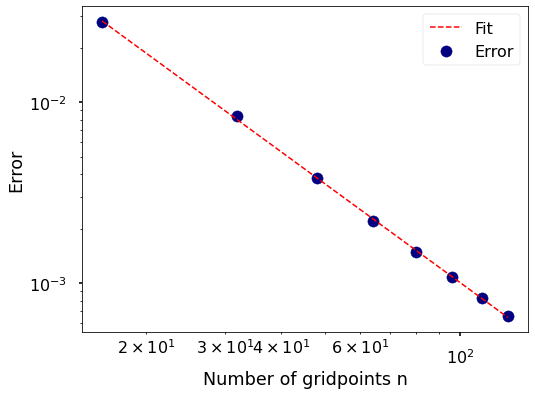

In [20]:
from scipy.optimize import curve_fit

y1 = np.array([16, 32, 48, 64, 80, 96, 112, 128])

def fit_func(x1, a, b):
    return a*x1 + b

params = curve_fit(fit_func,np.log(y1), np.log(e))

[a,b] = params[0]
print("Convergence order = " + str(-a))

plt.figure(figsize=(8,6))
plt.scatter(y1, e, label = "Error", color = "navy")
plt.plot(y1, np.exp(a*np.log(y1) + b), label = "Fit", color = "red", linestyle = "dashed", linewidth = '1.5')
plt.yscale('log')
plt.ylabel('Error')
plt.xscale('log')
plt.xlabel('Number of gridpoints n')
plt.legend()
plt.show()

Courant factor = 2.0
n =128


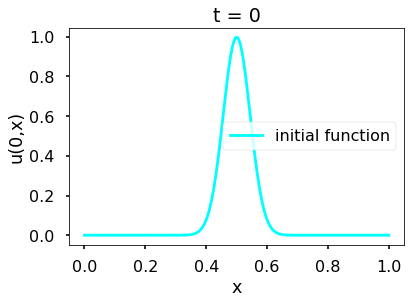

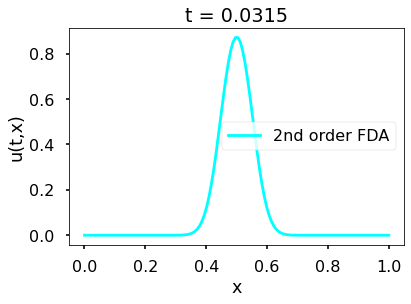

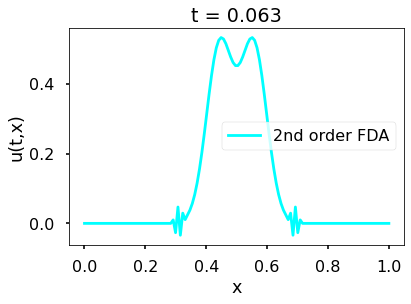

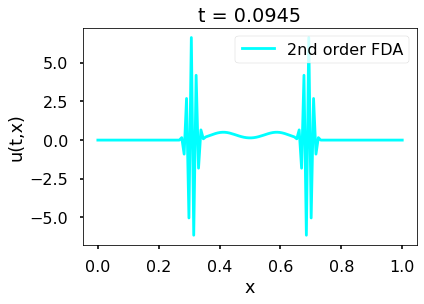

In [39]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn-poster')
%matplotlib inline

#courant factor 2 (dt = 2*dx , dx = h)

n = 128
h = 1/(n-1)

# Initial conditions
uo = np.zeros(n)
po = np.zeros(n)
x = np.zeros(n)
for j in range(0, n):
    x[j] = (j)*h
    #initial function
    uo[j] = math.exp(-((j*h) - 0.5)**2*256)
    if uo[j] < 0.0001:
        uo[j] = 0

#number of time steps m
m = 8
dt = 2*h

#evolution scheme
sol = []
u = np.zeros(n)
v = uo - po*dt
sol.append(v)
sol.append(uo)
a = np.zeros(n)
b = np.zeros(n)

#print(sol)

for s in range(1, m+1):
    for k in range(1, n-1):
        a = sol[s]
        b = sol[s-1]
        u[k] = (a[k+1] - 2*a[k]+ a[k-1])*dt**2/h**2 + 2*a[k] - b[k]
    sol.append(u)
    u = u*0
    a = a*0
    b = b*0
    #print(sol)

#needed for plot
y = np.linspace(0, 1, n)

print("Courant factor = " + str(dt/h))
print("n =" + str(n))

plt.figure(figsize=(6,4))
plt.plot(y, uo, label = "initial function", color = "cyan")
#plt.plot(1, 10, 'ro')
plt.xlabel('x')
plt.ylabel('u(0,x)')
plt.title("t = 0")
plt.legend()
plt.show()



plt.figure(figsize=(6,4))
plt.plot(y, sol[round(m/4)], label = "2nd order FDA", color = "cyan")
plt.xlabel('x')
plt.ylabel('u(t,x)')
plt.title("t = " + str(round(round(m/4)*dt,4)))
plt.legend()
plt.show()


plt.figure(figsize=(6,4))
plt.plot(y, sol[round(m/2)], label = "2nd order FDA", color = "cyan")
plt.xlabel('x')
plt.ylabel('u(t,x)')
plt.title("t = " + str(round(round(m/2)*dt,4)))
plt.legend()
plt.show()



plt.figure(figsize=(6,4))
plt.plot(y, sol[round(0.8*m)], label = "2nd order FDA", color = "cyan")
plt.xlabel('x')
plt.ylabel('u(t,x)')
plt.title("t = " + str(round(round(0.8*m)*dt,4)))
plt.legend()
plt.show()

Courant factor = 1.0
n =128


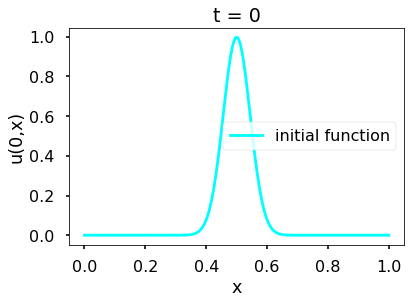

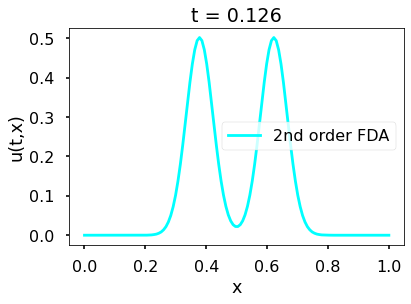

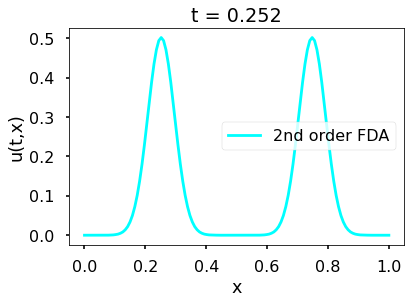

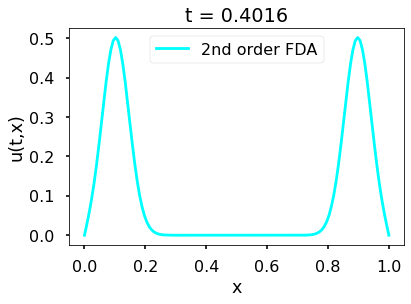

In [37]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn-poster')
%matplotlib inline

#courant factor 1 (dt = dx , dx = h)

n = 128
h = 1/(n-1)

# Initial conditions
uo = np.zeros(n)
po = np.zeros(n)
x = np.zeros(n)
for j in range(0, n):
    x[j] = (j)*h
    #initial function
    uo[j] = math.exp(-((j*h) - 0.5)**2*256)
    if uo[j] < 0.0001:
        uo[j] = 0

#number of time steps m
m = 64
dt = h

#evolution scheme
sol = []
u = np.zeros(n)
v = uo - po*dt
sol.append(v)
sol.append(uo)
a = np.zeros(n)
b = np.zeros(n)

#print(sol)

for s in range(1, m+1):
    for k in range(1, n-1):
        a = sol[s]
        b = sol[s-1]
        u[k] = (a[k+1] - 2*a[k]+ a[k-1])*dt**2/h**2 + 2*a[k] - b[k]
    sol.append(u)
    u = u*0
    a = a*0
    b = b*0
    #print(sol)

#needed for plot
y = np.linspace(0, 1, n)

print("Courant factor = " + str(dt/h))
print("n =" + str(n))

plt.figure(figsize=(6,4))
plt.plot(y, uo, label = "initial function", color = "cyan")
#plt.plot(1, 10, 'ro')
plt.xlabel('x')
plt.ylabel('u(0,x)')
plt.title("t = 0")
plt.legend()
plt.show()



plt.figure(figsize=(6,4))
plt.plot(y, sol[round(m/4)], label = "2nd order FDA", color = "cyan")
plt.xlabel('x')
plt.ylabel('u(t,x)')
plt.title("t = " + str(round(round(m/4)*dt,4)))
plt.legend()
plt.show()


plt.figure(figsize=(6,4))
plt.plot(y, sol[round(m/2)], label = "2nd order FDA", color = "cyan")
plt.xlabel('x')
plt.ylabel('u(t,x)')
plt.title("t = " + str(round(round(m/2)*dt,4)))
plt.legend()
plt.show()



plt.figure(figsize=(6,4))
plt.plot(y, sol[round(0.8*m)], label = "2nd order FDA", color = "cyan")
plt.xlabel('x')
plt.ylabel('u(t,x)')
plt.title("t = " + str(round(round(0.8*m)*dt,4)))
plt.legend()
plt.show()